In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [23]:

num_real_sigs = 49


def reverse_order(j, order):
    for i in range(len(order)):
        if j == order[i]:
            return i


# Load data
with open("./voyteklabstudy-default-rtdb-export.json") as f:
    results = json.load(f)


In [24]:

# ground truth has shape (num_participants,2)
# it shows the correct bursting classification
ground_truth = np.array(results["ground_truth"])

# List of names of human collaborators who labeled data
# length of which gives us number of labelings
who = list(results["selections"].keys())
print(type(who))
name = who[0]

result_element = results["selections"][who[0]]

# Performance:
error = np.zeros((len(who), 50, 2))

print("name is %s" % name)
# the i'th element of `order` is the index in signals, corresponding to the i'th signal the labeler saw.
order = np.array(results["selections"][name]['indices'])


<class 'list'>
name is Andrew Bender@1714089263343


In [25]:
'''
y_pred and y_true are variables for auc_roc
  we want to analyze humans as a whole.
  so y_pred is the interval the humans select (on average?)
  let's start with just one lab person.

'''

# initial values to allow for averaging or single perrson burst selections
y_pred = [[0,0]]*len(ground_truth)
num_pred = 0

# def find_overlap_intervals(selection_0, selection_1):
    
# Here we do not have burst labeling code because humans labeled the signals on a study labeling platform

0
0
[593 922]
[383 783]
0
47
[791 995]
[383 783]
0
3
[342 842]
[383 783]
0
76
[523 999]
[383 783]
0
13
[525 722]
[383 783]
0
7
[140 321]
[383 783]
0
83
[480 644]
[383 783]
0
24
[113 523]
[383 783]
0
53
[  0 520]
[383 783]
1
41
[303 511]
[156 323]
1
25
[692 974]
[156 323]
1
29
[636 898]
[156 323]
1
95
[-1 -1]
[156 323]
1
31
[618 782]
[156 323]
1
36
[195 594]
[156 323]
1
95
[595 807]
[156 323]
1
5
[617 812]
[156 323]
1
20
[306 579]
[156 323]
2
53
[  2 309]
[615 803]
2
64
[549 892]
[615 803]
2
60
[472 865]
[615 803]
2
68
[298 828]
[615 803]
2
10
[481 712]
[615 803]
2
25
[255 524]
[615 803]
2
36
[686 999]
[615 803]
2
95
[ 65 582]
[615 803]
2
58
[508 901]
[615 803]
3
68
[108 384]
[545 858]
3
43
[245 533]
[545 858]
3
39
[485 985]
[545 858]
3
83
[296 587]
[545 858]
3
88
[116 291]
[545 858]
3
40
[614 999]
[545 858]
3
70
[193 603]
[545 858]
3
82
[ 63 484]
[545 858]
3
57
[ 64 356]
[545 858]
4
58
[189 544]
[588 803]
4
41
[250 992]
[588 803]
4
23
[557 979]
[588 803]
4
85
[567 896]
[588 803]
4
46
[

/var/folders/x4/vyw3njlj5qs1ht18w3z1ykmm0000gn/T/ipykernel_97436/314507369.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure("figure "+str(i))



64
[158 464]
[ 71 571]
23
2
[538 900]
[ 71 571]
23
19
[477 659]
[ 71 571]
23
46
[553 893]
[ 71 571]
24
11
[181 480]
[613 891]
24
22
[181 567]
[613 891]
24
1
[514 979]
[613 891]
24
79
[ 59 483]
[613 891]
24
0
[169 598]
[613 891]
24
29
[  0 458]
[613 891]
24
62
[209 687]
[613 891]
24
18
[  7 696]
[613 891]
24
78
[199 501]
[613 891]
25
31
[609 842]
[476 726]
25
59
[ 23 447]
[476 726]
25
33
[602 950]
[476 726]
25
39
[191 591]
[476 726]
25
91
[-1 -1]
[476 726]
25
80
[504 859]
[476 726]
25
73
[385 894]
[476 726]
25
2
[-1 -1]
[476 726]
25
68
[596 943]
[476 726]
26
70
[575 923]
[517 817]
26
24
[ 95 621]
[517 817]
26
98
[  0 491]
[517 817]
26
40
[-1 -1]
[517 817]
26
14
[ 32 422]
[517 817]
26
83
[410 851]
[517 817]
26
5
[578 980]
[517 817]
26
71
[373 924]
[517 817]
26
8
[184 559]
[517 817]
27
4
[370 786]
[574 932]
27
65
[178 499]
[574 932]
27
68
[136 999]
[574 932]
27
13
[376 799]
[574 932]
27
7
[248 732]
[574 932]
27
79
[580 855]
[574 932]
27
89
[556 803]
[574 932]
27
27
[233 991]
[574 932]
27

ValueError: multiclass-multioutput format is not supported

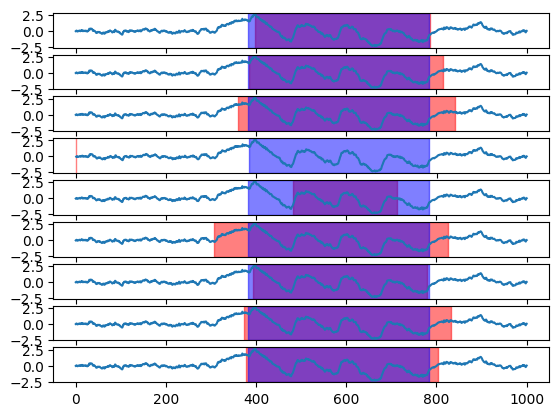

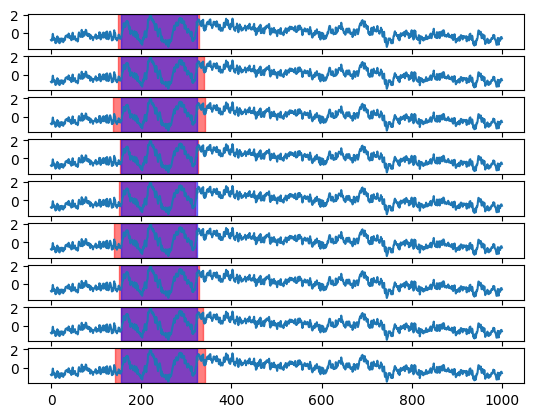

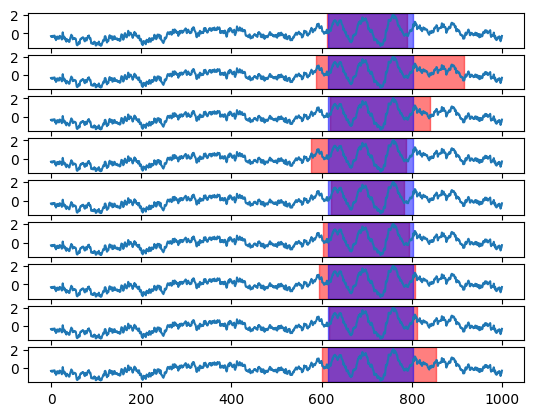

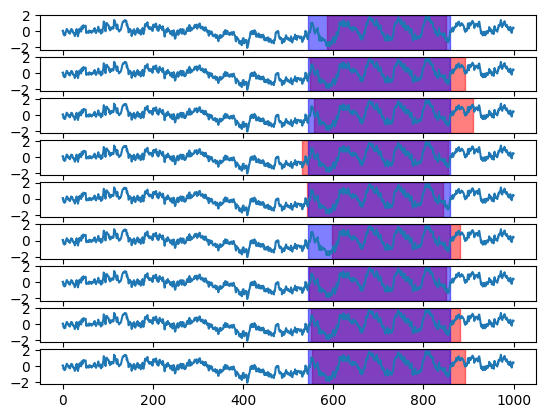

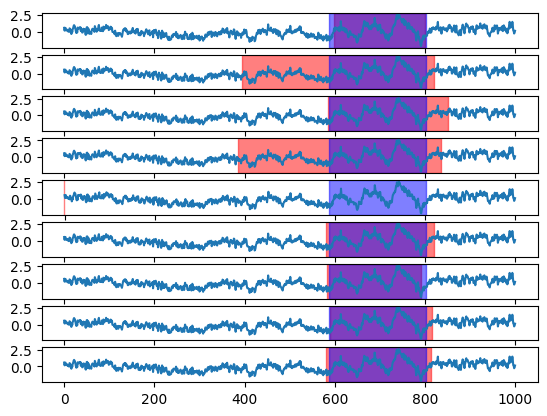

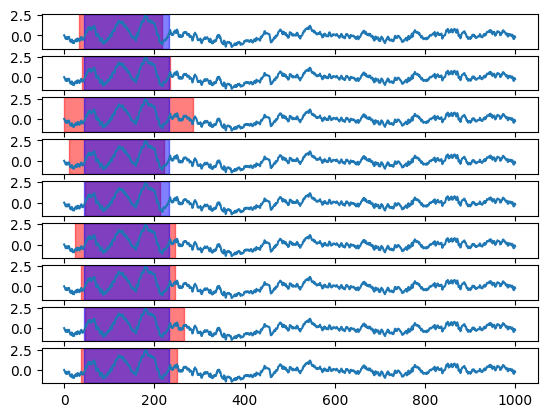

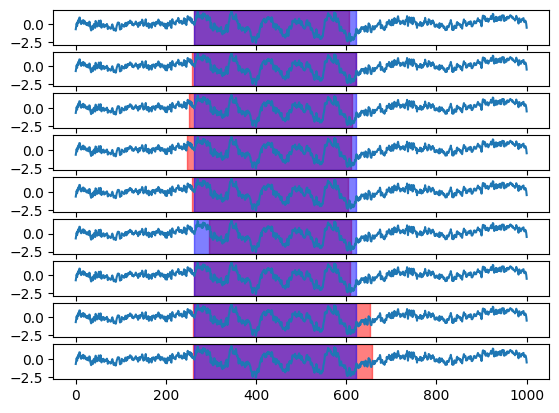

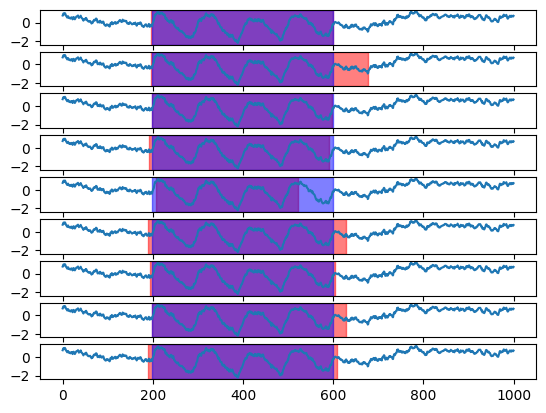

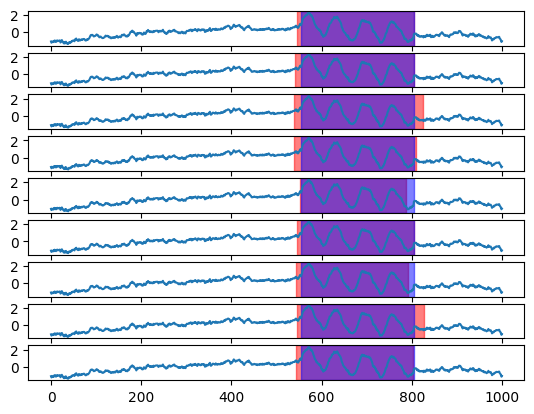

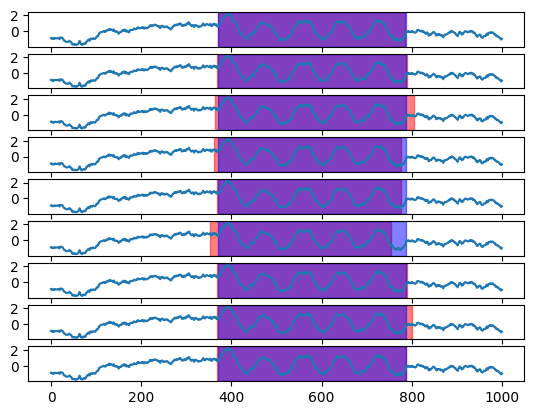

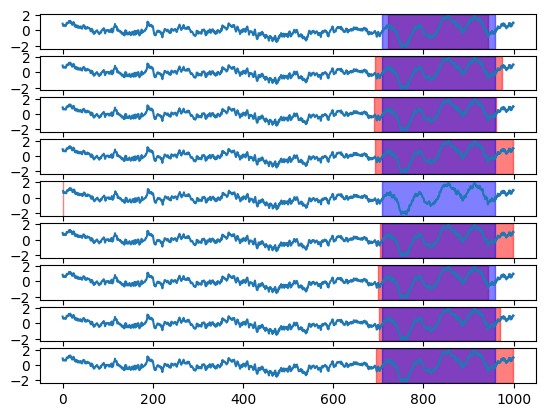

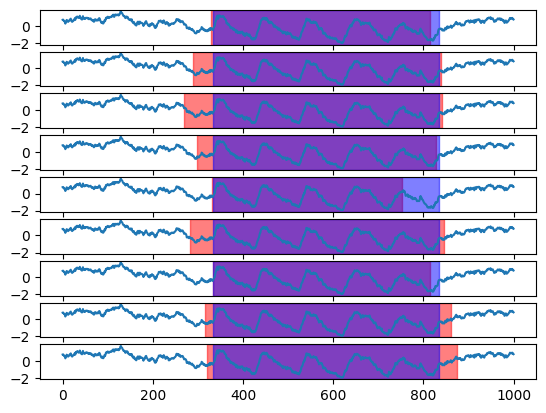

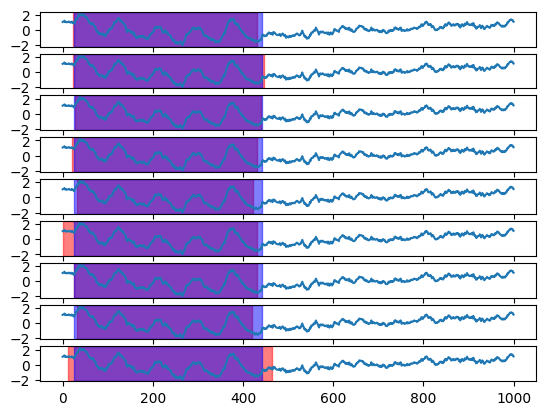

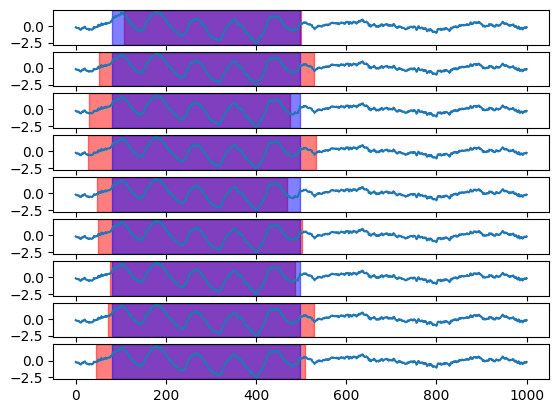

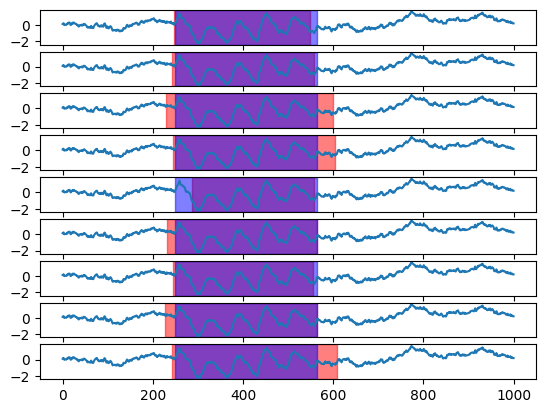

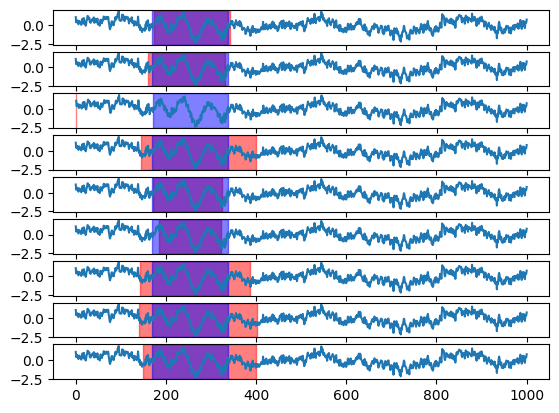

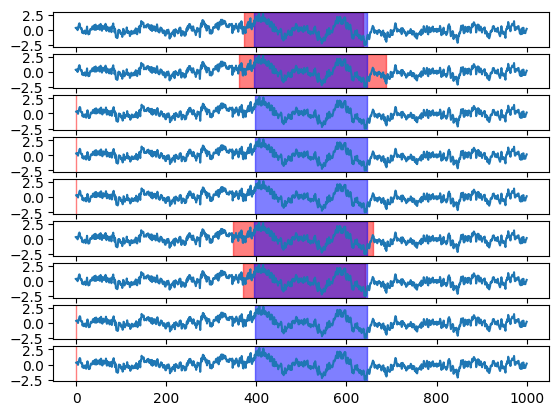

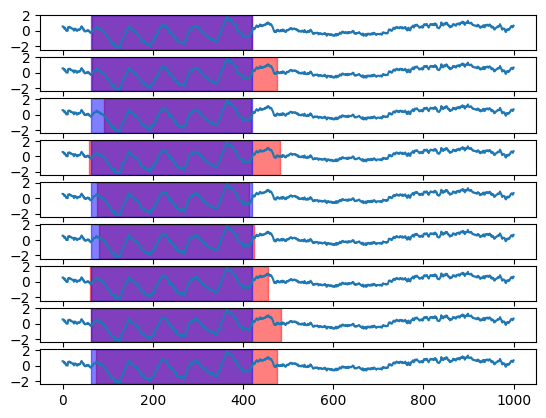

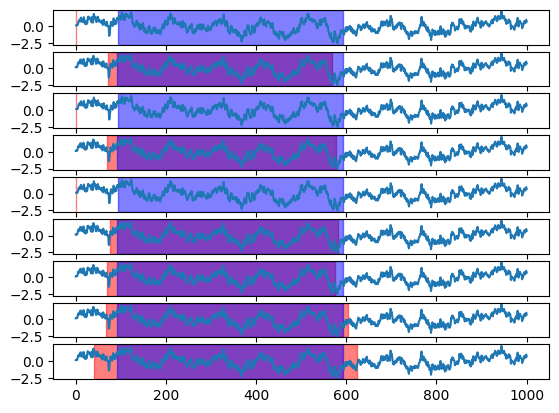

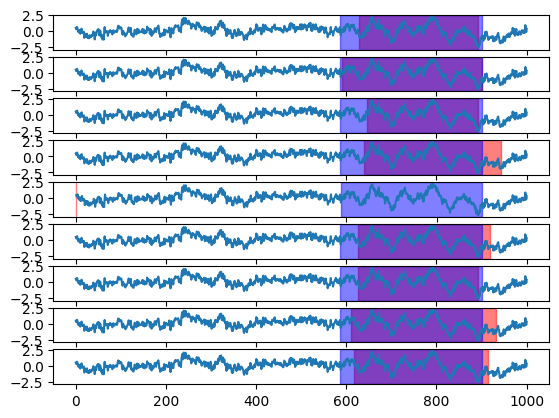

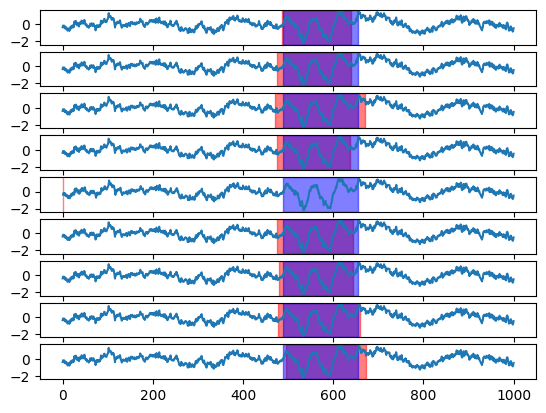

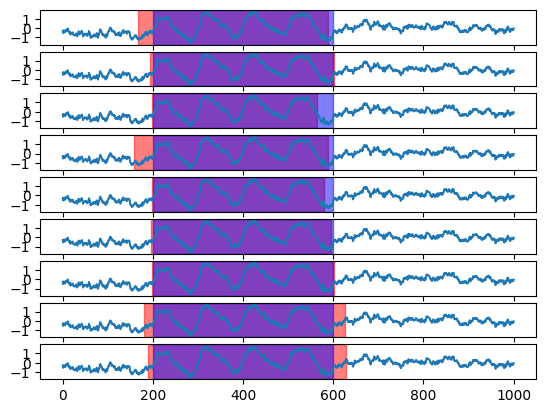

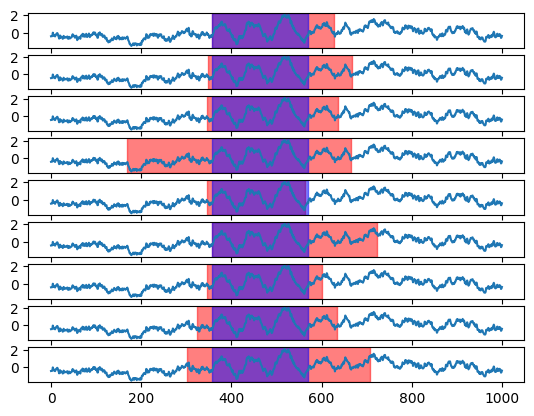

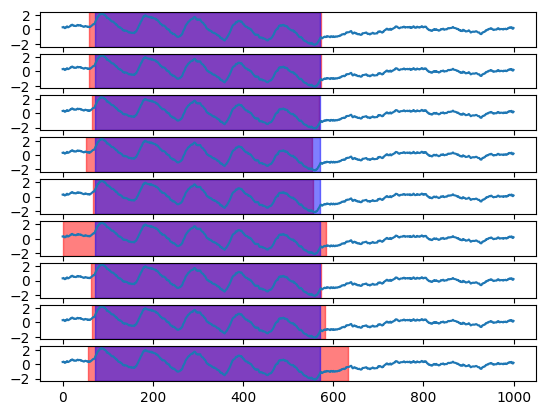

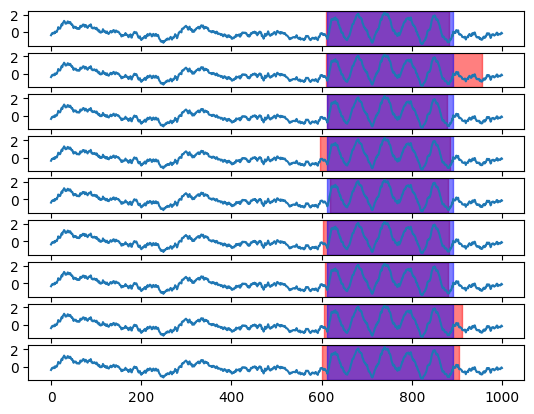

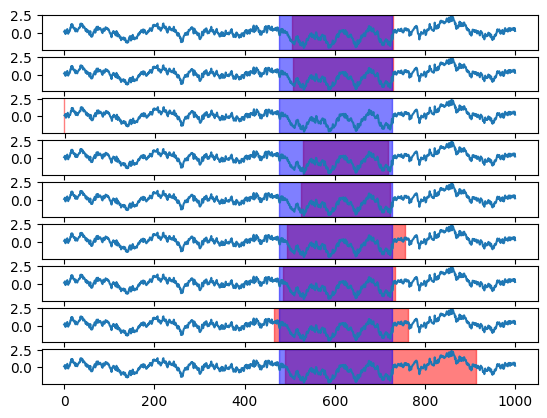

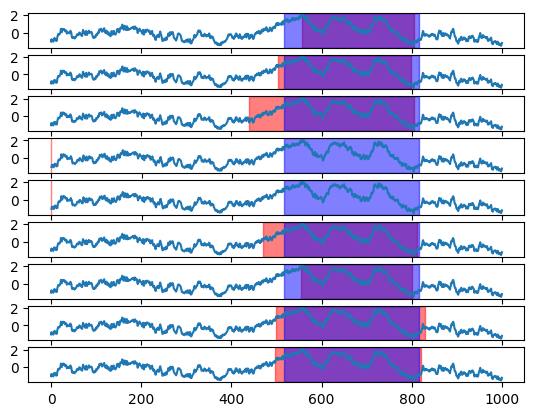

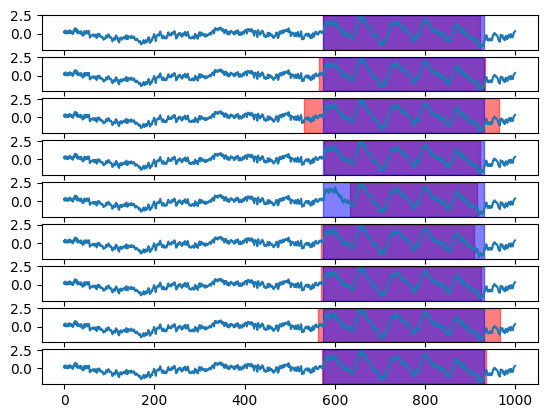

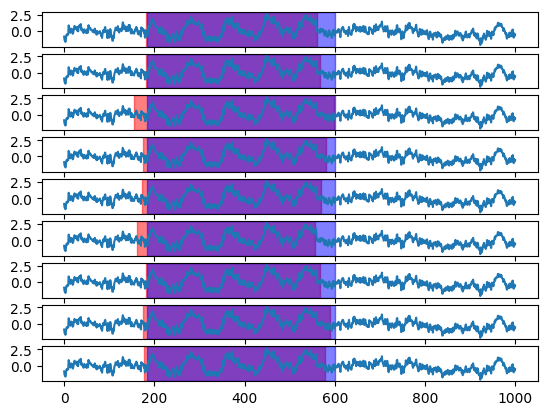

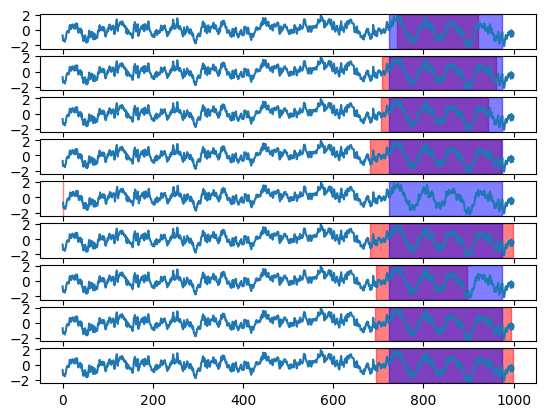

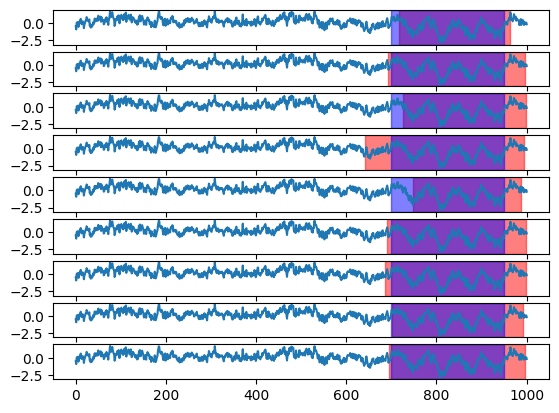

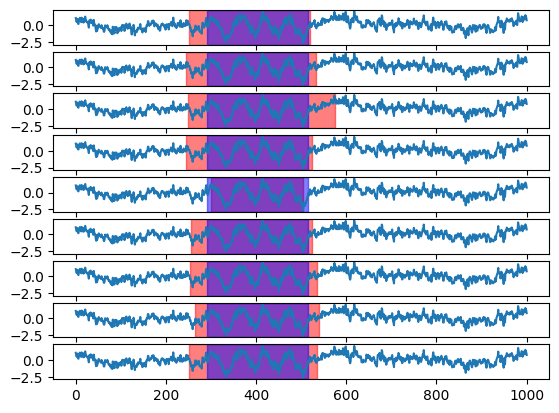

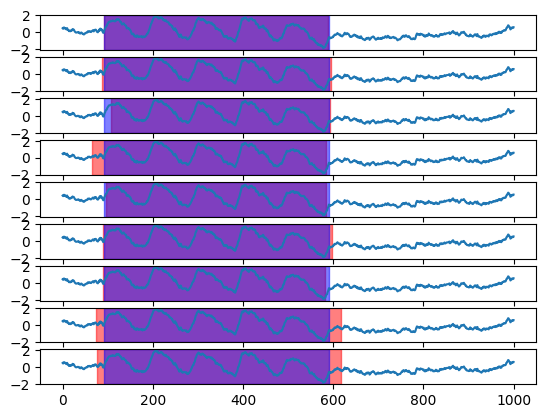

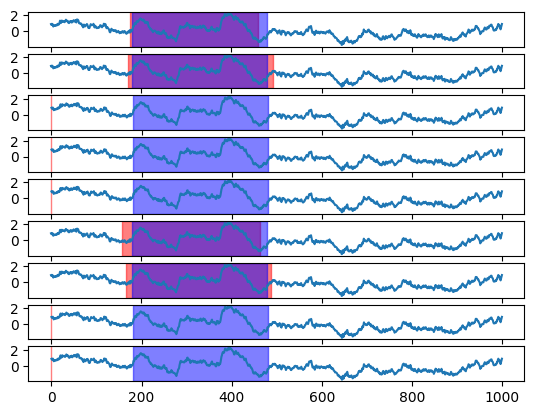

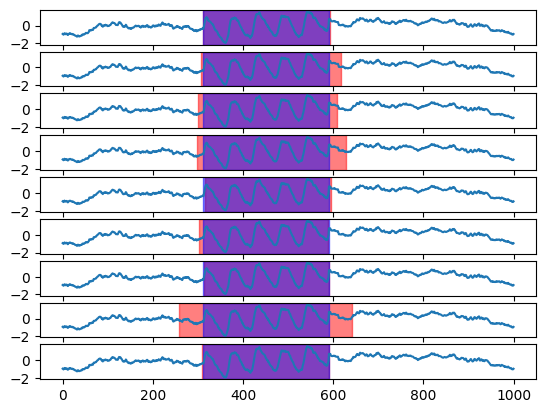

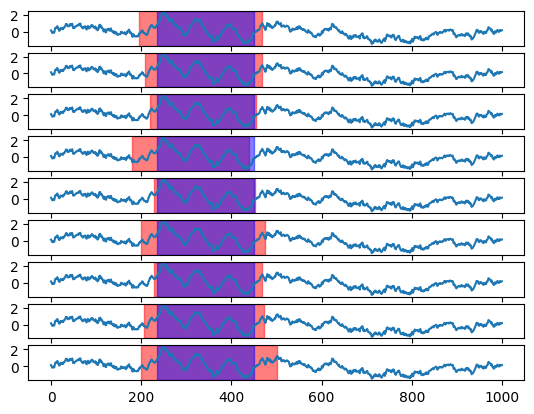

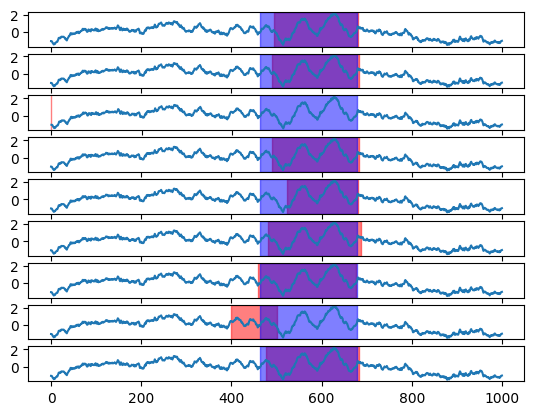

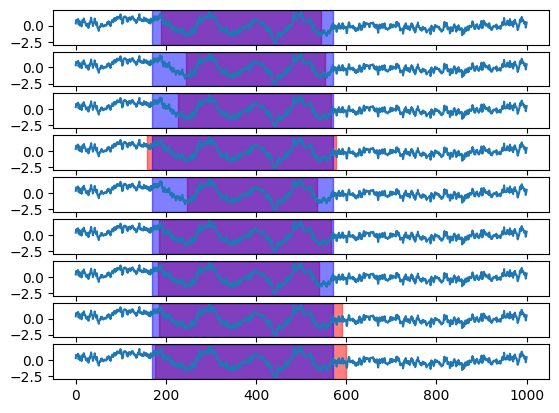

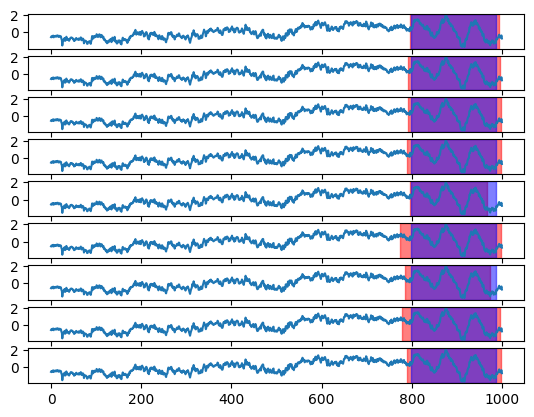

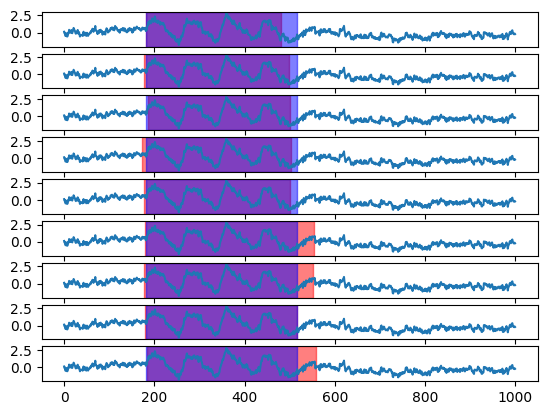

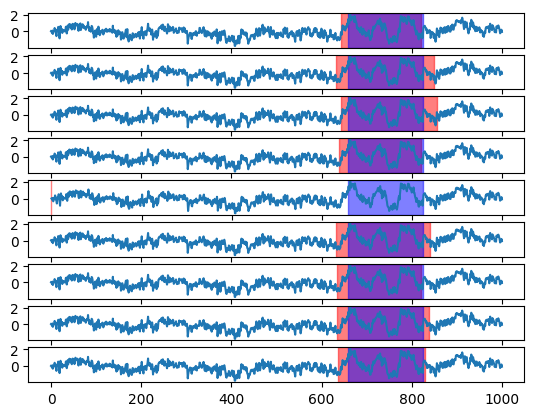

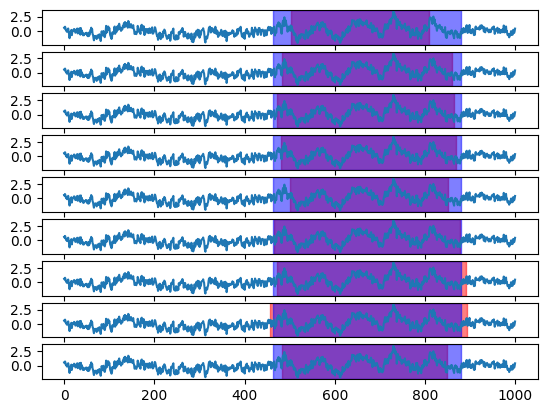

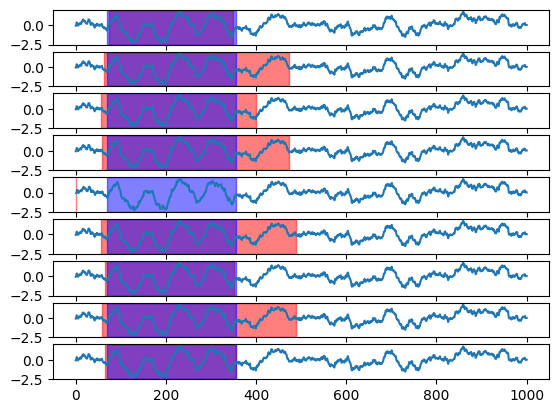

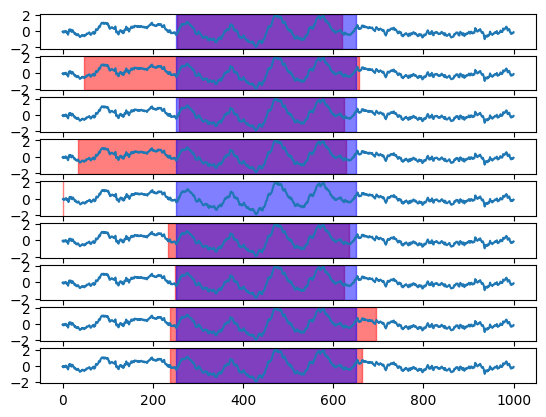

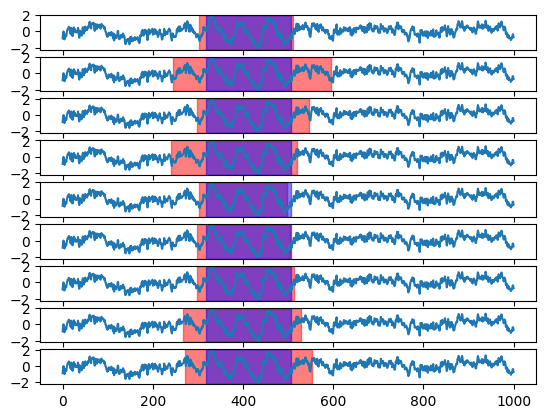

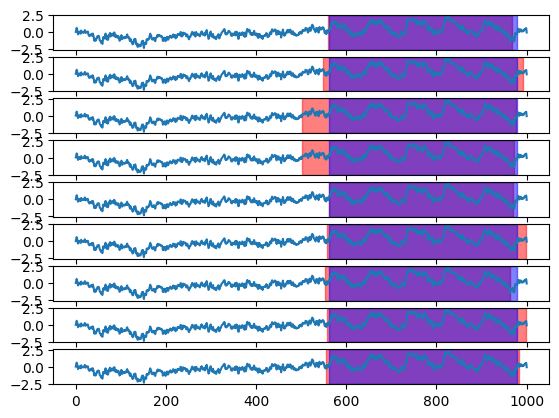

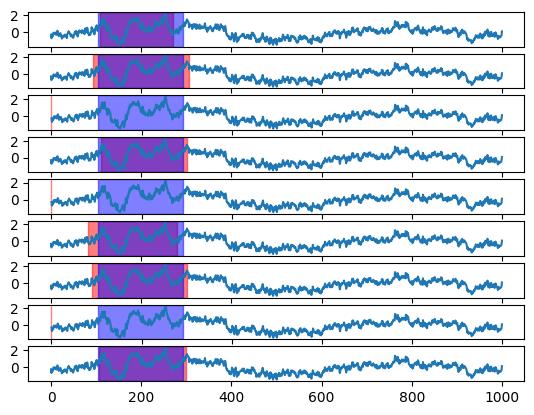

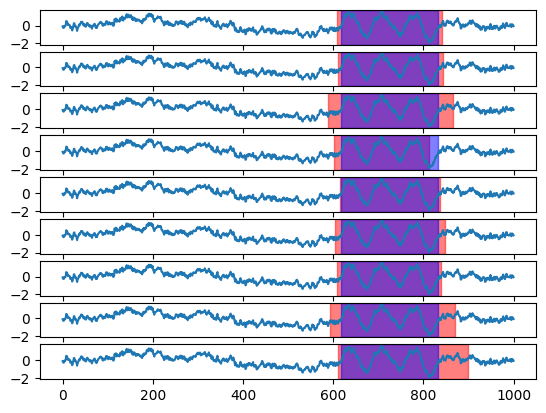

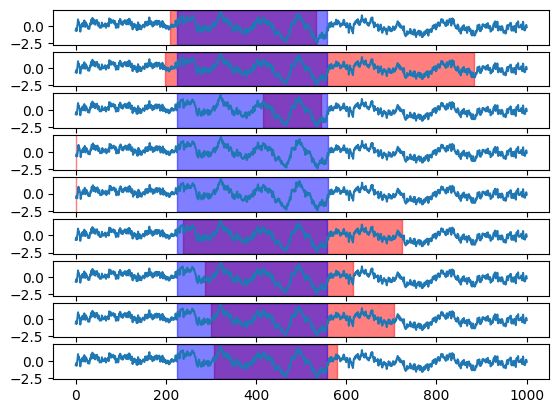

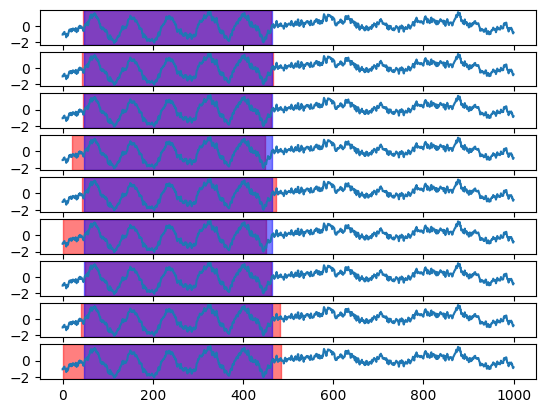

In [26]:

import sklearn.metrics


for i in range(len(ground_truth)):

    plt.figure("figure "+str(i))

    for j in range(len(who)):
        order = np.array(results["selections"][who[j]]['indices'])
        selections = np.array(results["selections"][who[j]]["selections"])
        reverse_search_sig_idx = reverse_order(i + num_real_sigs, order)
        selections_indexed_by_labeler = selections[reverse_search_sig_idx]
        # order: tp, fp, tn, fn
        print(i)
        print(order[i])
        print(selections[order[i]])
        print(ground_truth[i])
        curr_sig_idx = i+num_real_sigs
        eeg_signal_profiled_in_this_loop = results['sigs']['sig_'+str(
            i+num_real_sigs)]
        len_curr_sig = len(eeg_signal_profiled_in_this_loop)

        plt.subplot(len(who), 1, j+1)
        plt.plot(np.linspace(0, len_curr_sig, len_curr_sig),
                 eeg_signal_profiled_in_this_loop)
        plt.axvspan(
            selections_indexed_by_labeler[0], selections_indexed_by_labeler[1], color='red', alpha=0.5)
        plt.axvspan(ground_truth[i][0],
                    ground_truth[i][1], color='blue', alpha=0.5)

        overlap = 0
        start_overlap = max(
            selections_indexed_by_labeler[0], ground_truth[i][0])
        end_overlap = min(selections_indexed_by_labeler[1], ground_truth[i][1])
        if start_overlap < end_overlap:
            overlap = end_overlap-start_overlap

        y_pred[i][0] += selections_indexed_by_labeler[0]
        y_pred[i][1] += selections_indexed_by_labeler[1]
    y_pred[i][0]/=len(who)
    y_pred[i][1]/=len(who)

sklearn.metrics.roc_auc_score(y_true=ground_truth, y_score=y_pred)
plt.show()
selections = selections[np.argsort(order)[49:]]

for i in range(50):
    plt.close(i)

# This needs to be updated for AUC-ROC and AUC-PR instead
error[ind] = (selections - ground_truth)

# MAE Results
who = [" ".join(i.split("@")[0].split("_")[0].split(" ")[:2])
       for i in list(results["selections"].keys())]

abs_error = np.abs(error)

dict(zip(who, abs_error.mean(axis=(1, 2))))